<a href="https://colab.research.google.com/github/yuvalofek/FrequentistML/blob/master/FreqML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Frequentist ML Assignment 1 - Linear Regression** (Using the Iris dataset)
Yuval Epstain Ofek
---

Note: I have been trying to teach myself python, so I would love comments and tips 

---



# **The provided Prompt:**

Read sections 3.1 -3.2.1, 3.3- 3.4.3 of Elements of Satistical Learning (can be found here: https://web.stanford.edu/~hastie/ElemStatLearn/download.html)

Grab a dataset of interest from the UCI repository (or another repository), but make sure it is one that is good for regression. This means it's got numerical(not categorical) features, and the target is a continuous number.

Divide your data into roughly 80% train, 10% validation, 10% test. You must keep this split for all 3 parts of this assignment in order to compare the methods fairly.  Perform 3 flavors of linear regression:

**a)** Plain old linear regression, with no regularization. You must code this one by hand (i.e use equation 3.6 to find the betas).  Report the mean squared error on the test dataset.

**b)** Ridge regression. You must also code this one by hand(eq 3.44 to find the betas). Select the optimal value of Lambda by cross-validation using the validation dataset. Report the mean squared error on the test dataset, using the best lambda you found on the validation set. DO NOT USE THE TEST DATASET TO CHOOSE LAMBDA.

**c)** Lasso regression: Use one of the built in packages in sci-kit learn or MATLAB to do a Lasso regression. Select the optimal value of lambda as in part b) and also display a Lasso plot (there are built in functions for Lasso plot in sci-kit/MATLAB). Which features did the Lasso select for you to include in your model? Do these features make sense?

**Note:** Compute the MSE on the training dataset and the test dataset for all methods and comment on the results.  

Feeling brave? Do Lasso and Ridge plots(like figures 3.8 and 3.10). 



---



In [ ]:
# Get the iris dataset
# Only need to do this once, so I commented it out for debugging
#This is not a regression dataset persay (noticed this after the fact), but it seemed to have worked nonetheless
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

#Trying a different dataset (not really for regression but oh well)
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data


--2020-06-19 18:56:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.1’

iris.data.1         100%[===================>]   4.44K  --.-KB/s    in 0s      

2020-06-19 18:56:40 (96.6 MB/s) - ‘iris.data.1’ saved [4551/4551]



# **Iris Data Set**

[UCI page found here](https://archive.ics.uci.edu/ml/datasets/Iris)

From UCI, the attributes are: 
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
* Iris Setosa
* Iris Versicolour
* Iris Virginica

We want only numerical data, so I omit the last attribute. 

In [ ]:
#import stuff

from sklearn import linear_model as lm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def getdata (name, cols = None, shuffle = True ):
  # getdata (name, shuffle = True)
  # function to read the csv into a numpy array and shuffle columns. 
  # Shuffles columns if shuffle is true and leaves them if false

  # Loads the CSV data
  data = pd.read_csv(name, header=None, usecols=cols)
  #shuffling
  if shuffle:
    return data.sample(frac=1).reset_index(drop=True).to_numpy().astype(np.float)
  else:
    return data.to_numpy().astype(np.float)

In [ ]:
dshuf = getdata('iris.data', [0,1,2,3] , True)
#dshuf = getdata('wine.data', np.arange(0,13))



<function matplotlib.pyplot.show>

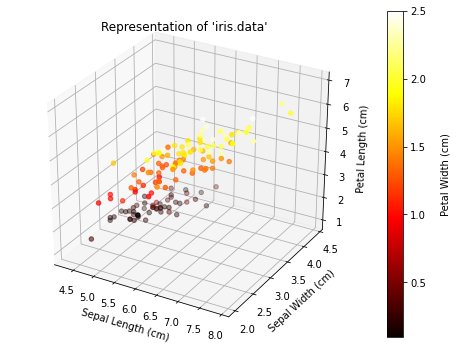

In [ ]:
#COMMENT: This is a nice visualization, but for lower dimensions (it worked when I was using the Iris set)

#plotting data to see that it appears somewhat linear (which it does) 
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(dshuf[:,0], dshuf[:,1], dshuf[:,2], c=dshuf[:,3], cmap=plt.hot())
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
ax.set_title('Representation of \'iris.data\' ')
cbar = fig.colorbar(img);
cbar.ax.get_yaxis().labelpad = 15; cbar.ax.set_ylabel('Petal Width (cm)');
plt.show

In [ ]:
### Spliting into Training, Validation, and Test

#percentage of data for training is 80% and for testing is 10%
perTrain = 0.80
perTest = 0.10 
len = dshuf.shape[0]

#indices to split 
i_train =  round(len*perTrain)
i_test = round(len*(perTest+perTrain))

#actually splitting data
tr_d  = dshuf[:i_train]
val_d = dshuf[i_train:i_test]
test_d = dshuf[i_test:]

#display sizes of the split data to verify splitting was done correctly
print(tr_d.shape, val_d.shape, test_d.shape)

(120, 4) (15, 4) (15, 4)


# Linear Regression


In [ ]:
#implementing eq 3.6
def linreg(x,y):
  return np.linalg.solve((x.T @ x),x.T@y)

In [ ]:
#Notes on the notation
#x = data[:,:-1] 
#y = data[:,-1]

beta = [-0.28359054  0.24977742  0.55486453]


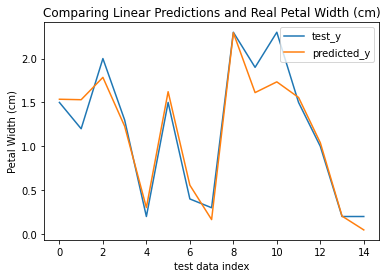

* Training MSE: 0.03143694702215564
* Validation MSE: 0.0703952684263503
* Test MSE: 0.044067016382197705


In [ ]:
#calling the plain old linear regression function on the training data
beta_lin = linreg(tr_d[:,:-1],tr_d[:,-1])
print('beta = ' + str(beta_lin))

#Calculate the MSE
trMSE_lin = np.mean((tr_d[:,-1]-tr_d[:,:-1]@beta_lin)**2)
valMSE_lin = np.mean((val_d[:,-1]-val_d[:,:-1]@beta_lin)**2)
testMSE_lin = np.mean((test_d[:,-1]-test_d[:,:-1]@beta_lin)**2)

nm_attr = test_d[:,-1].shape[0]
#Showing the test values and their prediction 
plt.plot(np.arange(0,nm_attr), test_d[:,-1])
plt.plot(np.arange(0,nm_attr),test_d[:,:-1]@beta_lin)
plt.legend(['test_y', 'predicted_y'])
plt.xlabel('test data index')
plt.ylabel('Petal Width (cm)')
plt.title('Comparing Linear Predictions and Real Petal Width (cm)')
plt.show()

#print results
print("* Training MSE: " + str(trMSE_lin))
print("* Validation MSE: " + str(valMSE_lin))
print("* Test MSE: " + str(testMSE_lin))

**Comments on Plain Old Linear Regression:**

Since I am reshuffling the data each time, the MSEs are bound to change. That being said, for the current run I get:

* Training MSE: 0.03143694702215564
* Validation MSE: 0.0703952684263503
* Test MSE: 0.044067016382197705

The prediction seems to fit the actual data pretty well, which is great! The MSEs are also around the same magnitude. After multiple iterations of shuffling the data we see the different MSEs are not confined with respect to each other (meaning that sometimes the training MSE is higher than the validation MSE, but other times it is lower). This is expected, as we only use the training data to generate the model. The training data should have some influence on the test and validation data (infered by the data being used for linear regression), but it does not have any say regarding their MSEs beyond having a similar magnitude to the training MSE (also not guarenteed, but  through shuffling this is likely to be the case). 

# Ridge Regression


In [ ]:
#implementing eq 3.44
def ridgereg(x,y,lam):
  return np.linalg.solve(x.T @ x + lam*np.eye(x.shape[1]),x.T@y)

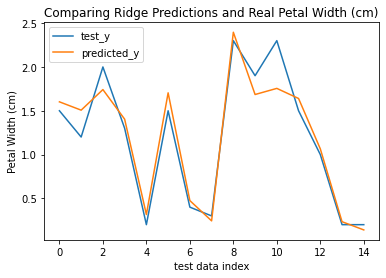

Optimal Lambda: 7.99079907990799
* MSE for training data: 0.036415125729061616
* MSE for validation data: 0.06454793946308299
* MSE from test data: 0.04178479287928075


In [ ]:
#Create a rande oof lambda values and generate index currosponding to each. 
#range chosen for lambda is as seen in the book
lamrange = np.linspace(0, 20, 10000)

#initialize val_ridge
valMSE_ridge = float('inf')
opt_lambda_ridge = None
#iterate over the lambdas to see where we get the minimum MSE
for lam in lamrange:
  beta_ridge = ridgereg(tr_d[:,:-1],tr_d[:,-1],lam)
  #MSE from validation:
  MSE = np.mean((val_d[:,-1]-val_d[:,:-1]@beta_ridge)**2)
  #If we are at a new minimum, update the MSE and the optimal lambda
  if MSE < valMSE_ridge: 
    valMSE_ridge = MSE
    opt_lambda_ridge = lam

opt_beta_ridge = ridgereg(tr_d[:,:-1],tr_d[:,-1],opt_lambda_ridge)

#Other MSEs
trMSE_ridge= np.mean((tr_d[:,-1]-tr_d[:,:-1]@opt_beta_ridge)**2)
testMSE_ridge= np.mean((test_d[:,-1]-test_d[:,:-1]@opt_beta_ridge)**2)

#Showing the test values and their prediction 
plt.plot(np.arange(0,nm_attr), test_d[:,-1])
plt.plot(np.arange(0,nm_attr),test_d[:,:-1]@opt_beta_ridge)
plt.legend(['test_y', 'predicted_y'])
plt.xlabel('test data index')
plt.ylabel('Petal Width (cm)')
plt.title('Comparing Ridge Predictions and Real Petal Width (cm)')
plt.show()

#printing MSEs and lambda (latter to show we reached the min)
print('Optimal Lambda: ' + str(opt_lambda_ridge))
#print('Optimal Beta: ' + str(opt_beta_ridge))
print('* MSE for training data: ' + str(trMSE_ridge))
print('* MSE for validation data: ' + str(valMSE_ridge))
print('* MSE from test data: ' + str(testMSE_ridge))



**Comments on Ridge Regression:**

The MSEs for the Ridge Regression for this run were: 

* MSE for training data: 0.036415125729061616
* MSE for validation data: 0.06454793946308299
* MSE from test data: 0.04178479287928075

These are about the same magnitude as the linear regression, again indicating that this is a pretty good fit, again supported by the plot. We notice that the MSE from the validation data with the ridge regression was lower than that from the linear regression. This is expected, as we are aiming to minimize the validation MSE. Also note that the linear regression model doesn't see the validation data at all, so it is unlikely to have arrived at the minimum MSE for the validation data like the ridge regression aims to do. Another comment to make is that the MSE for the training data increased slightly. This is also expected, as the linear regression aims to minimize the MSE of the training data, but in the Ridge Regression we shifted the data using lambda, and so the MSE we are minimizing is not for the training data anymore. The test MSE may be above or bellow the other MSEs, but generally has the same magnitude as them. 

# Lasso Regression

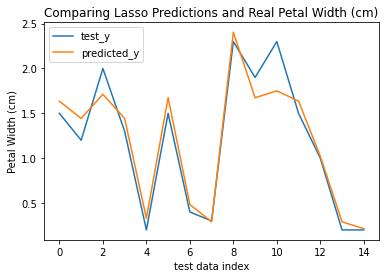

Optimal alpha: 0.10419369369369369
* MSE for training data: 0.04357694745369078
* MSE for validation data: 0.06451979823783945
* MSE from test data: 0.04169152106821079
.

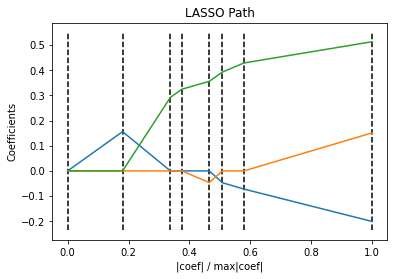

In [ ]:
# This time we don't need to implement the regression model, but get to use one 
# of the sklearn functions

# The function is called a bit differently this time
# Documentation said not to use alpha = 0 -> 10e-5 which is close enough
alpharange = np.linspace(10e-5, 1, 1000)


# initialize val_lasso
valMSE_lasso = float('inf')
opt_alpha_lasso = []
for alp in alpharange:
  reg = lm.Lasso(alpha = alp)
  reg.fit(tr_d[:,:-1],tr_d[:,-1])
  #MSE from validation:
  MSE = np.mean((val_d[:,-1]-reg.predict(val_d[:,:-1]))**2)
  #If we are at a new minimum MSE, update the MSE and the optimal lambda
  if MSE < valMSE_ridge: 
    valMSE_lasso = MSE
    opt_alpha_lasso = alp

reg2 = lm.Lasso(alpha = opt_alpha_lasso)
reg2.fit(tr_d[:,:-1],tr_d[:,-1])


#Other MSEs
trMSE_lasso= np.mean((tr_d[:,-1]-reg2.predict(tr_d[:,:-1]))**2)
testMSE_lasso= np.mean((test_d[:,-1]-reg2.predict(test_d[:,:-1]))**2)

#Showing the test values and their prediction 
plt.plot(np.arange(0,nm_attr), test_d[:,-1])
plt.plot(np.arange(0,nm_attr),reg2.predict(test_d[:,:-1]))
plt.legend(['test_y', 'predicted_y'])
plt.xlabel('test data index')
plt.ylabel('Petal Width (cm)')
plt.title('Comparing Lasso Predictions and Real Petal Width (cm)')
plt.show()


#printing MSEs alnd alpha/lambda found
print('Optimal alpha: ' + str(opt_alpha_lasso))
print('* MSE for training data: ' + str(trMSE_lasso))
print('* MSE for validation data: ' + str(valMSE_lasso))
print('* MSE from test data: ' + str(testMSE_lasso))

#Lasso Plot
_, _, coefs = lm.lars_path(test_d[:,:-1], test_d[:,-1], method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.show()

**Comments on Lasso Regression:**

The MSEs for the Lasso Regression for this run were:

* MSE for training data: 0.04357694745369078
* MSE for validation data: 0.06451979823783945
* MSE from test data: 0.04169152106821079

Again we are around the same magnitude. The validation MSE is pretty much the same as the Ridge validation MSE, which is expected given we are looking to minimize the validation MSE for a fixed training set. The other two MSEs are close to the ridge values, but very slightly off. This is expected as we are using different methods. 

In [ ]:
from tabulate import tabulate

l = [["Training", trMSE_lin, trMSE_ridge,trMSE_lasso], ["Validation",valMSE_lin, valMSE_ridge,valMSE_lasso], ["Test",testMSE_lin, testMSE_ridge,testMSE_lasso]]
table = tabulate(l, headers=['Linear Regression (MSE)', 'Ridge Regression (MSE)', 'Lasso Regression (MSE)'], tablefmt='orgtbl')

print(table)

|            |   Linear Regression (MSE) |   Ridge Regression (MSE) |   Lasso Regression (MSE) |
|------------+---------------------------+--------------------------+--------------------------|
| Training   |                 0.0314369 |                0.0364151 |                0.0435769 |
| Validation |                 0.0703953 |                0.0645479 |                0.0645198 |
| Test       |                 0.044067  |                0.0417848 |                0.0416915 |


# Overall Conclusions

Comparing all of the different types of regression isn't too straight forward because they all depend on the initial shuffling of the dataset. Overall, we see that all three methods did a pretty good job here, given that the magnitude of the MSEs are low.

The table from the run used for all the MSEs is as follows:


```
|            |   Linear Regression (MSE) |   Ridge Regression (MSE) |   Lasso Regression (MSE) |
|------------+---------------------------+--------------------------+--------------------------|
| Training   |                 0.0314369 |                0.0364151 |                0.0435769 |
| Validation |                 0.0703953 |                0.0645479 |                0.0645198 |
| Test       |                 0.044067  |                0.0417848 |                0.0416915 |
```
Here we see that the Lasso Regression did the best job at finding a linear regression for the test case (the MSE is the lowest), but in other runs it was actually the worst. Generally, it seemed that the MSEs were lowest for Lasso, then Ridge, and finally the largest for Linear (Lasso <Ridge < Linear).  One thing to take away is that this is all dependant on the subset of the data that is in each of the divisions we made and that this, as much as we don't want it to, influences the MSE of our results. 
